Регрессия — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо предсказать числовую целевую переменную

Линейная регрессия (Linear Regression) — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

## Аналитическое решение

In [9]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
#создаём DataFrame из загруженных numpy-матриц
diabetes_data = pd.DataFrame(
    data=diabetes.data, #данные
    columns=diabetes.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
diabetes_data['target'] = diabetes.target
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений. Поэтому если в ваших данных окажутся пропуски, обязательно заранее позаботьтесь о них.

Также модель не умеет работать с категориальными признаками, представленными в виде типа object. Прежде чем подавать в модель линейной регрессии категориальные признаки, необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.

/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_53037/1191166594.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  correlations = diabetes_data.corr().applymap(lambda x: abs(x))


<Axes: >

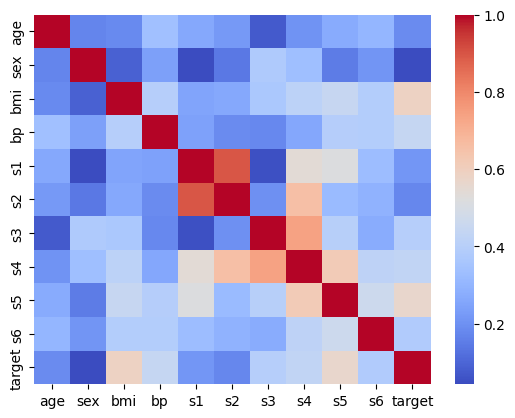

In [5]:
correlations = diabetes_data.corr().applymap(lambda x: abs(x))
sns.heatmap(correlations, robust=True, cmap='coolwarm')

Итак, самый коррелированный по модулю с прогрессией заболевания признак — Индекс массы тела (bmi). Давайте построим линейную регрессию, используя этот признак.

In [6]:
X = diabetes_data[['bmi']]
y = diabetes_data['target']
# Двойные квадратные скобки diabetes_data[['bmi']] позволяют выбрать признак из DataFrame, сохранив его в виде таблицы. Это важно, так как в формуле МНК X — это матрица.

In [7]:
# напишем функцию linear_regression(), в которой реализуем вычисления коэффициентов
def linear_regression(X, y):
    # создаем вектор из единиц
    ones = np.ones(X.shape[0])
    # добавляем этот вектор в таблицу первым столбцом 
    X = np.column_stack([ones, X])
    Q = np.linalg.inv(X.T @ X)
    w = Q @ X.T @ y
    return w    

In [8]:
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))

Vector w: [-117.77336657   10.23312787]
w0: -117.77
w1: 10.23


In [9]:
def plot_regression_2d(X, y_true, y_predict, xlabel='bmi', ylabel='target'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

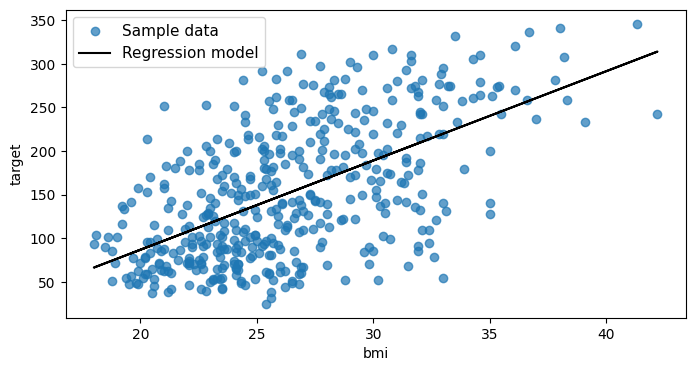

In [10]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [11]:
model = LinearRegression()
model.fit(X, y)

print(f'w0: {model.intercept_}') # свободный член w0
print(f'w1: {model.coef_}') # остальные параметры модели w1, w2,.., wm

w0: -117.77336656656527
w1: [10.23312787]


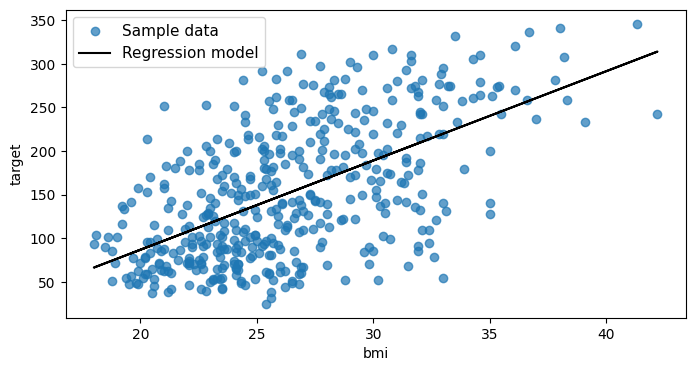

In [12]:
y_predict = model.predict(X)
plot_regression_2d(X, y, y_predict)

In [14]:
features = diabetes_data.drop('target', axis=1).columns
X = diabetes_data[features]
y = diabetes_data['target']
lr_full = LinearRegression()
lr_full.fit(X, y)

LinearRegression()

In [15]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'features': features, 'coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'features': ['intercept'], 'coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,features,coefficients
0,age,-0.036361
1,sex,-22.859648
2,bmi,5.602962
3,bp,1.116808
4,s1,-1.089996
5,s2,0.746450
6,s3,0.372005
7,s4,6.533832
8,s5,68.483125
9,s6,0.280117


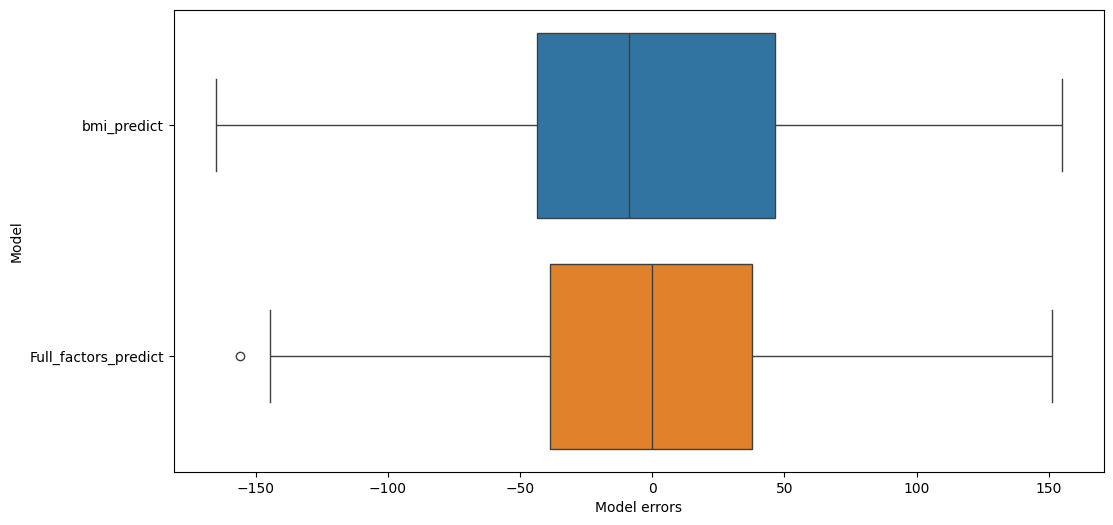

In [16]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - model.predict(diabetes_data[['bmi']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(diabetes_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'bmi_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к 0. То есть можно сказать, что визуально качество второй модели выглядит лучше.

In [17]:
startup = pd.read_csv('/Users/olgazdanova/Downloads/50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
X = startup.drop(columns=['State', 'Profit'])
y = startup['Profit']
start_model = LinearRegression()
start_model.fit(X, y)

LinearRegression()

In [19]:
start_model.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

## Метрики

Метрика — это численное выражение качества моделирования.

In [21]:
y_predict_bmi = model.predict(diabetes_data[['bmi']])
y = diabetes_data['target']

print('MAE score: {:.3f}'.format(metrics.mean_absolute_error(y, y_predict_bmi)))

print('MAPE score: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y, y_predict_bmi) * 100))

print('RMSE score: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_bmi))))

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_bmi)))

MAE score: 51.799
MAPE score: 47.687%
RMSE score: 62.374
R2 score: 0.344


In [22]:
y_predict_full = lr_full.predict(diabetes_data[features])

print('MAE score: {:.3f}'.format(metrics.mean_absolute_error(y, y_predict_full)))

print('MAPE score: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))

print('RMSE score: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))

MAE score: 43.277
MAPE score: 38.786%
RMSE score: 53.476
R2 score: 0.518


Если сравнить полученные метрики, то становится очевидно, что вторая модель значительно превосходит первую по качеству. То есть в данном случае намного лучше использовать модель со всеми признаками, чем модель, в которой есть данные только по индексу массы тела.

In [24]:
y_true = [1.23, 2.35 ,2.75]
y_pred = [1.01, 12.3, 2.74]

print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

RMSE score: 5.75


In [25]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

print('R2 score: {:.2f}'.format(metrics.r2_score(y_true, y_pred)))

R2 score: 0.71


Оказывается, у такого простого подхода (МНК) есть один большой минус — это работа с большим количеством признаков.

Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.

Первая и вторая проблемы решаются с помощью замены аналитического МНК на численные методы, такие как градиентный спуск.

Третий недостаток МНК больше теоретический и заключается в том, что матрица  в результате вычислений может не существовать. Это связано с математическими особенностями вычисления обратной матрицы, которые мы рассмотрим далее в курсе. 

Причина этой проблемы — мультиколлинеарность факторов (сильная корреляционная связь). Из-за этого коэффициенты линейной регрессии становятся слишком большими и модель становится неустойчивой. 

Проблема решается с помощью регуляризации.

## Численное решение

Самым популярным численным методом оптимизации, используемым в машинном обучении, является алгоритм градиентного спуска.

Градиентный спуск (Gradient descent) — самый используемый алгоритм минимизации функции потерь.

Главное требование к функции потерь — это её гладкость во всех точках

С математической точки зрения гладкими называются функции, которые имеют производную во всех точках.

Благодаря своей простоте алгоритм обладает минимальной вычислительной сложностью и работает быстрее, чем метод наименьших квадратов, даже на огромных наборах данных с тысячами признаков.

Однако у градиентного спуска есть одна большая проблема — это сходимость алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.

Стохастическая модификация алгоритма предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части.

Для градиентного спуска (особенно стохастического) важно, чтобы все факторы были приведены к единому масштабу с помощью нормализации/стандартизации. 

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('/Users/olgazdanova/Downloads/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
X = boston_data[['LSTAT']] # матрица наблюдений (только 1 признак)
y = boston_data['MEDV'] # вектор правильных ответов

In [3]:
# создаем объект класса; стохастический градиентный спуск
sgd_lr_lstat = SGDRegressor(random_state=42)
# обучаем модель
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [4]:
print(f'w0: {sgd_lr_lstat.intercept_}')
print(f'w1: {sgd_lr_lstat.coef_}')

w0: [34.33010969]
w1: [-0.96193242]


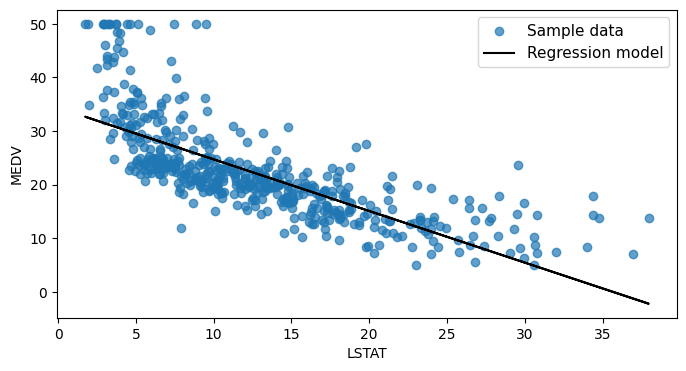

In [7]:
#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [8]:

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.542


In [11]:
# теперь построим модель уже на всех признаках

features = boston_data.drop('MEDV', axis=1).columns
X = boston_data[features]
y = boston_data['MEDV']

sgd_lr_full = SGDRegressor(random_state=42)
sgd_lr_full.fit(X, y)

SGDRegressor(random_state=42)

In [12]:
# Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
# Составляем строчку таблицы со свободным членом
intercenpt_df = pd.DataFrame({'Features':['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercenpt_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-3.587993e+11
1,ZN,1.610538e+11
2,INDUS,-2.835432e+11
3,CHAS,-4.468529e+10
4,NOX,-2.883663e+09
5,RM,-6.682351e+10
6,AGE,5.842412e+11
7,DIS,-8.760444e+08
8,RAD,1.377576e+11
9,TAX,-8.630247e+10


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

In [14]:
y_predict = sgd_lr_full.predict(X)
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -196736798953222382657994752.000


R2 отрицательный. Да ещё какой! Напомним, отрицательный R2 говорит о том, что модель абсолютно не описывает зависимости в данных.

Причина тому - отсутствие масштабирования. Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций очень важно масштабировать данные с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

In [15]:
# стандартизируем значения

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [17]:
# попробуем обучить модель на стандартизированных данных
sgd_lr_new = SGDRegressor(random_state=42)
sgd_lr_new.fit(X_scaled, y)

SGDRegressor(random_state=42)

In [19]:
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_new.coef_})
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_new.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [20]:
y_pr = sgd_lr_new.predict(X_scaled)

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_pr)))

R2 score: 0.740


In [21]:
# что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1
# создаём объект класса линейной регрессии с SGD
sgd_lr_bad = SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
# обучаем модель — ищем параметры по методу SGD
# подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
# предсказываем медианную цену для всех участков из набора данных
# передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
# рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -335415038359.631


R2 < 0, то есть SGD разошёлся из-за слишком высокого темпа обучения.

In [22]:
# Что будет, если поставить слишком маленькое значение параметра eta0? Например, 0.000001.
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1.578


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Снова R2 < 0, но также мы видим предупреждение (warning), которое говорит о том, что алгоритму не хватило количества итераций (max_iter), чтобы добраться до минимума. То есть SGD не дошёл до точки минимума из-за слишком низкого темпа обучения.

In [25]:
# установим параметр остановки, равный 0.1 (по умолчанию 0.01)
sgd_lr_tol = SGDRegressor(tol = 0.1, random_state=42)
sgd_lr_tol.fit(X_scaled, y)

SGDRegressor(random_state=42, tol=0.1)

In [27]:
y_predict = sgd_lr_tol.predict(X_scaled)
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


Если стоит задача одноразового обучения на всех данных, которые есть, и признаков немного (меньше 1 000), наш выбор — LinearRegression, так как МНК обеспечивает простое решение и гарантированную сходимость.

Если стоит задача непрерывного обучения модели в процессе её эксплуатации или количество признаков очень велико, наш выбор — SGDRegressor с возможностью корректировки параметров на новых данных.

## Дилемма смещения и разброса. Полиномиальные признаки. Регуляризация

Дилемма смещения и разброса - проблема всего обучения с учителем.

С теоретической точки зрения недообучение и переобучение характеризуются понятиями смещения и разброса модели.

СМЕЩЕНИЕ (bias) — это МАТЕМАТИЧЕСКОЕ ОЖИДАНИЕ (М/Е) разности между истинным ответом и ответом, выданным моделью. То есть это ОЖИДАЕМАЯ ОШИБКА модели.

Чем больше смещение, тем слабее модель. Если модель слабая, она не в состоянии выучить закономерность. Таким образом, налицо недообучение модели.

РАЗБРОС (variance) — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это ДИСПЕРСИЯ (разброс) ответов модели.

Чем больше разброс, тем больше ошибка будет колебаться на разных наборах данных. Наличие высокого разброса и есть свидетельство переобучения: модель подстроилась под конкретный набор данных и даёт высокий разброс ответов на разных данных.

Усложняя модель, мы пытаемся уменьшить смещение (bias), однако появляется риск получить переобучение, то есть мы повышаем разброс (variance). 

С другой стороны, снизить разброс (variance) позволяют более простые модели, не склонные к переобучению, но есть риск, что простая модель не уловит зависимостей и окажется недообученной, то есть мы повышаем смещение (bias).

Для того, чтобы решить эту проблему (дилемму), и делят данные на обучающую и тестовую выборки

In [4]:
features = boston_data.drop('MEDV', axis=1).columns
X = boston_data[features]
y = boston_data['MEDV']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train R2 score: {:.3f}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score: {:.3f}'.format(r2_score(y_test, y_test_predict)))

Train R2 score: 0.743
Test R2 score: 0.722


Результаты на двух выборках близки друг к другу (низкий разброс ответов), что является одним из свидетельств отсутствия переобучения. 

Самый простой способ оценить смещение и недообученность модели — посмотреть на значение метрики и интуитивно оценить её.

R2 = 0.722 - не слишком уж высокий показатель

In [6]:

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
# генерируем полиномиальные признаки; вернет numpy-матрицу
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


Мы сгенерировали новые тренировочные и тестовые наборы данных. В каждой таблице в дополнение к 13 изначальным признакам добавилась 91 полиномиальная комбинация степени 2.

In [7]:
new_model = LinearRegression()
new_model.fit(X_train_poly, y_train)
#
y_train_poly_predict = new_model.predict(X_train_poly)
y_test_poly_predict = new_model.predict(X_test_poly)

print('Train R2: {:.3f}'.format(r2_score(y_train, y_train_poly_predict)))
print('Test R2: {:.3f}'.format(r2_score(y_test, y_test_poly_predict)))

Train R2: 0.929
Test R2: 0.268


Повысили метрику на тренировочной выборке (вышли из недообучения), но видим большой разброс показателей между двумя выборками (получили переобучение)

Регуляризация — способ уменьшения переобучения моделей машинного обучения.

Идея регуляризации состоит в том, что мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс. Закон баланса в действии!

Математически это будет очень простая операция — добавление к функции потерь некоторого штрафа.

Штраф — это дополнительное неотрицательное слагаемое в выражении для функции потерь, которое специально повышает ошибку.  За счёт этого слагаемого метод оптимизации (OLS или SGD) будет находить не истинный минимум функции потерь, а псевдоминимум.

Отличительной особенностью L1-регуляризации является то, что коэффициенты, которые соответствуют «ненужным», по мнению модели, факторам, обнуляются, то есть факторы просто не будут участвовать в предсказании. Это очень важно для сложных моделей, в обучении которых используются множество факторов (как в нашей модели выше — 91 фактор). Тем самым мы уменьшим сложность модели, сократим её разброс и, как следствие, уменьшим переобучение.

In [8]:
# стандартизируем признаки 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# создаем генератор полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


Давайте построим модель линейной регрессии с L1-регуляризацией на сгенерированных нами ранее полиномиальных признаках.

In [10]:
lasso = Lasso(alpha=0.1) # alpha=1 по умолчанию, но получается сильная регуляризация, поэтому ставим 0.1
lasso.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = lasso.predict(X_train_scaled_poly)
y_test_predict_poly = lasso.predict(X_test_scaled_poly)

print('Train R2: {:.3f}'.format(r2_score(y_train, y_train_predict_poly)))
print('Test R2: {:.3f}'.format(r2_score(y_test, y_test_predict_poly)))

Train R2: 0.879
Test R2: 0.882


Несмотря на то, что метрика на тренировочной выборке несколько упала, на тестовой наоборот выросла - смогли преодолеть переобучение

In [11]:
# выведем значения коэффициентов модели
print(np.round(lasso.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


Обратим внимание, что большая часть коэффициентов обнулилась. Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

In [12]:
# теперь то же самое, но с l2-регуляризацией
ridge = Ridge(alpha=10) # alpha = 1 по умолчанию
ridge.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = ridge.predict(X_train_scaled_poly)
y_test_predict_poly = ridge.predict(X_test_scaled_poly)

print('Train R2: {:.3f}'.format(r2_score(y_train, y_train_predict_poly)))
print('Test R2: {:.3f}'.format(r2_score(y_test, y_test_predict_poly)))

Train R2: 0.907
Test R2: 0.848


Значения метрики R2 на тестовой выборке для L1-регуляризации получились немного выше. В первую очередь мы всегда ориентируемся на тестовую выборку — это данные, которые модель ещё не видела.

In [13]:
# выведем значения коэффициентов модели
print(np.round(ridge.coef_, 3))

[ 0.128 -0.049  0.084  0.117 -0.932  2.848 -1.008 -1.464  0.909 -0.908
 -0.653  0.971 -2.605  0.085 -0.032  0.466  2.721 -0.507  0.986  0.309
 -0.391 -0.714  0.376 -0.379  0.072  0.287  0.143 -0.138 -0.014  0.315
  0.05  -0.409 -0.316  0.075  0.702  0.08  -0.281 -0.37   0.511  0.175
  0.72   0.282  0.477  0.888 -0.012  0.074 -0.052  0.166 -0.263  0.414
 -1.129 -0.852  0.273  0.227 -0.106  0.368 -0.137 -0.241 -0.697 -0.177
 -0.326 -0.524  0.882 -0.637  0.344 -0.439 -0.006  0.386  0.233 -0.535
  0.111 -0.802 -0.662 -0.56   0.22  -1.001  0.123  0.144  0.889 -0.114
 -0.086 -1.022 -0.71   1.08  -0.446 -0.178 -0.07  -0.496  0.874 -0.926
  0.717  0.601 -0.49  -0.723  0.308  1.086 -0.448 -1.256  0.057  0.354
 -0.059 -0.433 -0.791  0.177]


Видно, что L2-регуляризация не обнуляет коэффициенты — она использует для предсказания все признаки.

In [14]:
# теперь применим регуляризацию, но коэффициент альфа будем перебирать для поиска наилучшего
# создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)

# создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled_poly, y_train)
    y_train_poly_predict = lasso.predict(X_train_scaled_poly)
    y_test_poly_predict = lasso.predict(X_test_scaled_poly)
    train_scores.append(r2_score(y_train, y_train_poly_predict))
    test_scores.append(r2_score(y_test, y_test_poly_predict))

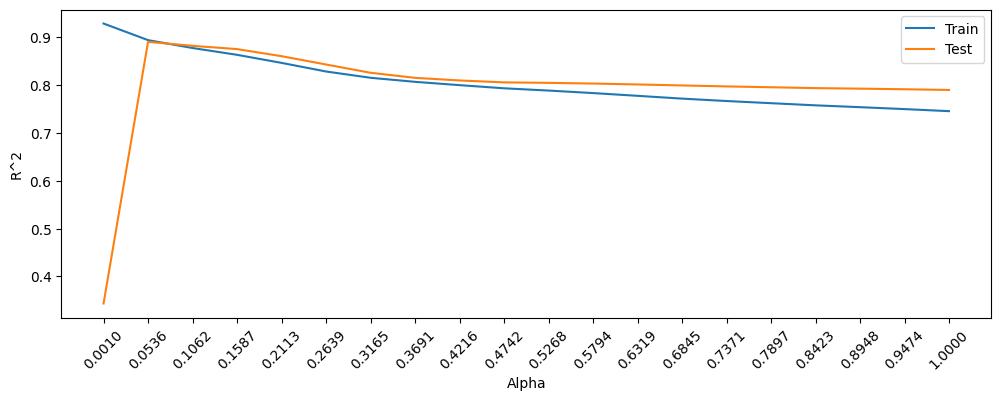

In [15]:
# визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

Видим, что наилучшие результаты при альфа = 0.0536. Подставим

In [16]:
lasso = Lasso(alpha=0.0536) 
lasso.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = lasso.predict(X_train_scaled_poly)
y_test_predict_poly = lasso.predict(X_test_scaled_poly)

print('Train R2: {:.3f}'.format(r2_score(y_train, y_train_predict_poly)))
print('Test R2: {:.3f}'.format(r2_score(y_test, y_test_predict_poly)))

Train R2: 0.894
Test R2: 0.890


Метрика R2 выросла благодаря тому, что мы смогли подобрать оптимальное значение параметра alpha.